# **CROP PREDICTION**

**Crop yield prediction is one of the challenging tasks in agriculture. It plays an essential role in decision making at global, regional, and field levels. The prediction of crop yield is based on soil, meteorological, environmental, and crop parameters.**

**Crop yield prediction systems provide for better planning and decision-making to increase production. The proposed system involves a prediction module based on data mining classification algorithm namely Random Forest used to forecast the yield of major crops based on historical data**

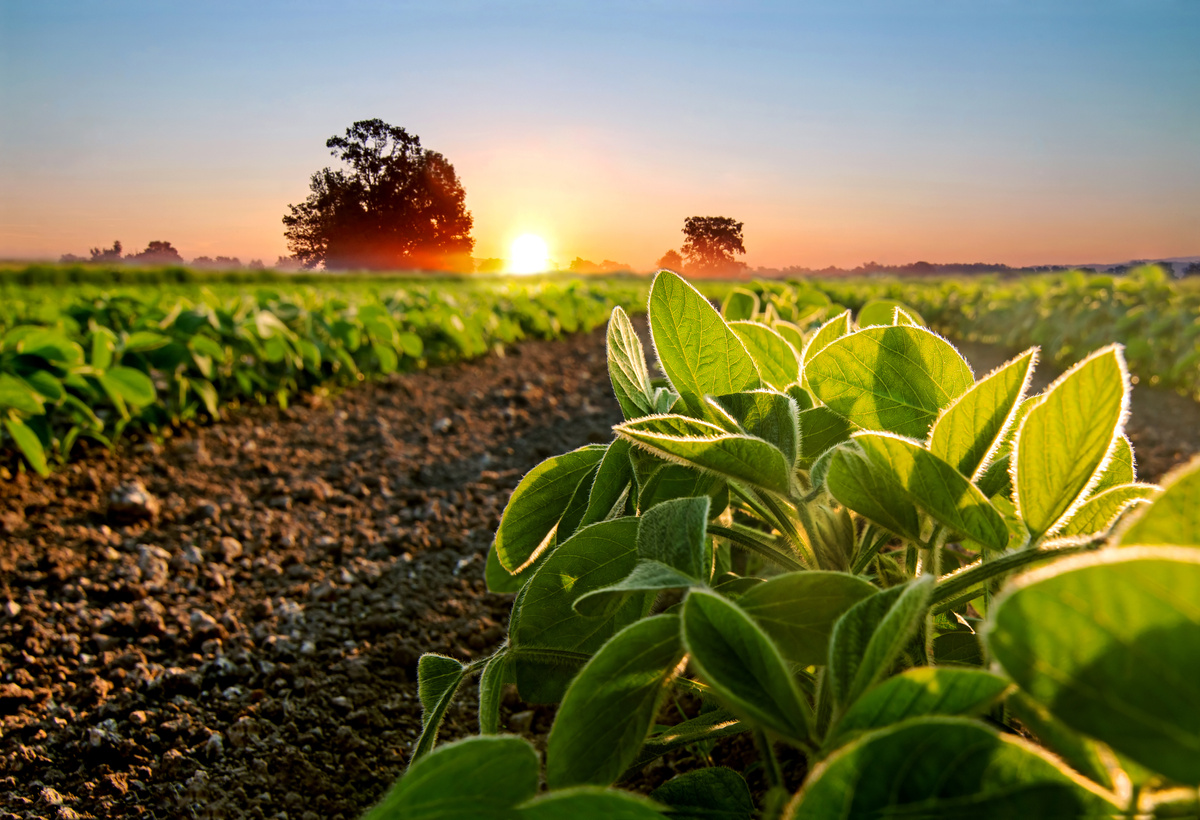

# **IMPORTING LIBRARIES**

In [57]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **READING DATA FILE**

In [58]:
df=pd.read_csv("/kaggle/input/crop-prediction-data/indiancrop_dataset.csv")
df.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N_SOIL       2200 non-null   int64  
 1   P_SOIL       2200 non-null   int64  
 2   K_SOIL       2200 non-null   int64  
 3   TEMPERATURE  2200 non-null   float64
 4   HUMIDITY     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   RAINFALL     2200 non-null   float64
 7   STATE        2200 non-null   object 
 8   CROP_PRICE   2200 non-null   int64  
 9   CROP         2200 non-null   object 
dtypes: float64(4), int64(4), object(2)
memory usage: 172.0+ KB


# **DATA PREPROCESSING**

In [60]:
df.isnull().sum()

N_SOIL         0
P_SOIL         0
K_SOIL         0
TEMPERATURE    0
HUMIDITY       0
ph             0
RAINFALL       0
STATE          0
CROP_PRICE     0
CROP           0
dtype: int64

In [61]:
df.corr()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,CROP_PRICE
N_SOIL,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020,-0.001302
P_SOIL,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839,-0.023683
K_SOIL,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461,-0.021923
TEMPERATURE,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084,-0.029044
HUMIDITY,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423,-0.041414
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069,-0.033548
RAINFALL,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000,0.058847
CROP_PRICE,-0.001302,-0.023683,-0.021923,-0.029044,-0.041414,-0.033548,0.058847,1.000000


<AxesSubplot:>

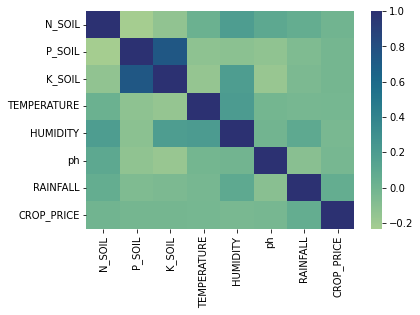

In [62]:
sns.heatmap(df.corr(),cmap="crest")

In [63]:
df.nunique()

N_SOIL          137
P_SOIL          117
K_SOIL           73
TEMPERATURE    2200
HUMIDITY       2200
ph             2200
RAINFALL       2200
STATE            26
CROP_PRICE      502
CROP             22
dtype: int64

In [64]:
df.CROP.unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [65]:
#df.drop(['STATE'],axis=1,inplace=True)

In [66]:
df

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE,CROP
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Andaman and Nicobar,7000,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Andaman and Nicobar,5000,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Andaman and Nicobar,7000,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Andaman and Nicobar,7000,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Andaman and Nicobar,120000,Rice
...,...,...,...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,West Bengal,1000,Coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,West Bengal,800,Coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,West Bengal,560,Coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,West Bengal,1500,Coffee


# **SKEWNESS**

In [67]:
df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


N_SOIL          0.509721
P_SOIL          1.010773
K_SOIL          2.375167
TEMPERATURE     0.184933
HUMIDITY       -1.091708
ph              0.283929
RAINFALL        0.965756
CROP_PRICE     15.926745
dtype: float64

In [68]:
df.P_SOIL=np.log(df['P_SOIL'])

In [69]:
df.K_SOIL=np.log(df['K_SOIL'])

In [70]:
df['HUMIDITY']=np.log(df['HUMIDITY'])

In [71]:
iq1=df['CROP_PRICE'].quantile(0.25)
iq2=df['CROP_PRICE'].quantile(0.75)
iq1

950.0

In [72]:
iq2

3500.0

In [73]:
df['CROP_PRICE']=np.where(df['CROP_PRICE']<iq1,iq1,df['CROP_PRICE'])
df['CROP_PRICE']=np.where(df['CROP_PRICE']>iq2,iq2,df['CROP_PRICE'])

In [74]:
df.skew()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


N_SOIL         0.509721
P_SOIL        -0.782108
K_SOIL         0.804010
TEMPERATURE    0.184933
HUMIDITY      -1.900877
ph             0.283929
RAINFALL       0.965756
CROP_PRICE     0.283069
dtype: float64

# **ENCODING CATEGORICAL INTO NUMERICAL**

In [75]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['CROP']=le.fit_transform(df['CROP'])
df['STATE'] = le.fit_transform(df['STATE'])


# **SPLITING OF FEATURES**

In [76]:
x=df.iloc[:,0:9]
y=df.iloc[:,9]
x.head()

,N_SOIL,P_SOIL,K_SOIL,TEMPERATURE,HUMIDITY,ph,RAINFALL,STATE,CROP_PRICE
0,90,3.737670,3.761200,20.879744,4.406753,6.502985,202.935536,0,3500.0
1,85,4.060443,3.713572,21.770462,4.386014,7.038096,226.655537,0,3500.0
2,60,4.007333,3.784190,23.004459,4.410623,7.840207,263.964248,0,3500.0
3,74,3.555348,3.688879,26.491096,4.384004,6.980401,242.864034,0,3500.0
4,78,3.737670,3.737670,20.130175,4.401889,7.628473,262.717340,0,3500.0


In [77]:
y.unique()

array([20, 11,  3,  9, 18, 13, 14,  2, 10, 19,  1, 12,  7, 21, 15,  0, 16,
       17,  4,  6,  8,  5])

###Training a model

**TRAIN-TEST-SPLIT**

In [78]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,random_state=1)

In [79]:
print("Training data",x_train.shape)

Training data (1540, 9)


In [80]:
print("Training data",x_test.shape)

Training data (660, 9)


# **IMPORTING ALGORITHM**

**NAIVE BAYES**  and **XGBClassifier**                      
XGB perfoms slightly better

In [81]:
# Naive Bayes
# from sklearn.naive_bayes import GaussianNB
# model = GaussianNB()

#XGBoost
from xgboost import XGBClassifier
model = XGBClassifier(objective = 'multi:softmax', num_class = len(y.unique()))

In [82]:
model.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
              importance_type=None, interaction_constraints='',
              learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
              max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
              missing=nan, monotone_constraints='()', n_estimators=100,
              n_jobs=0, num_class=22, num_parallel_tree=1,
              objective='multi:softmax', predictor='auto', random_state=0, ...)

**PREDICTION OF CROP**

In [83]:
y_prediction=model.predict(x_test)

# **MODEL METRICS**

In [84]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_prediction)

1.0

# **SAVING THE MODEL**

In [29]:
import pickle

In [ ]:
filename='trained_model.sav'
pickle.dump(model,open(filename,'wb'))

In [ ]:
loaded_model=pickle.load(open('trained_model.sav','rb'))

In [ ]:
input_data=(49,4.234107,4.406719,18.315615,2.731860,7.263119,81.787105,3500.0)
input_array=np.asarray(input_data)
data_reshape=input_array.reshape(1,-1)
prediction=model.predict(data_reshape)
print(prediction)
